# Data Analysis
i) Which are the numerical and which are the categorical?

ii) Is there a greater trend to need an increase in the availability of bicycles? Study this question
from various perspectives:

• Can any trend be seen comparing different hours, weeks, and months?

• Is there any difference between weekdays and holidays?

• Is there any trend depending on the weather? Rainy days, snowy days, etc.

Write concise answers to each question and support your findings with evidence (statistics, plots,
etc.). Discuss the results. Additionally, you can explore the correlation of features, outliers, range of
values, and many more aspects.

In [90]:
import pandas as pd
data = pd.read_csv('data/training_data.csv')

In [91]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1600 entries, 0 to 1599
Data columns (total 16 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   hour_of_day     1600 non-null   int64  
 1   day_of_week     1600 non-null   int64  
 2   month           1600 non-null   int64  
 3   holiday         1600 non-null   int64  
 4   weekday         1600 non-null   int64  
 5   summertime      1600 non-null   int64  
 6   temp            1600 non-null   float64
 7   dew             1600 non-null   float64
 8   humidity        1600 non-null   float64
 9   precip          1600 non-null   float64
 10  snow            1600 non-null   int64  
 11  snowdepth       1600 non-null   float64
 12  windspeed       1600 non-null   float64
 13  cloudcover      1600 non-null   float64
 14  visibility      1600 non-null   float64
 15  increase_stock  1600 non-null   object 
dtypes: float64(8), int64(7), object(1)
memory usage: 200.1+ KB


In [92]:
categorical = data[['hour_of_day','day_of_week','month','holiday','weekday','summertime','snow','increase_stock']]
# Snow is a very bad variable it's only either 0 or nan
numerical = data[['temp','dew','humidity','precip','snowdepth','windspeed','cloudcover','visibility']]

In [93]:
# Different hours
hours = sorted(data['hour_of_day'].unique())
hours_high_demand = []
hours_low_demand = []
for hour in hours:
  hours_high_demand.append(len(data.query("hour_of_day == @hour and increase_stock == 'high_bike_demand'")))
  hours_low_demand.append(len(data.query("hour_of_day == @hour and increase_stock == 'low_bike_demand'")))

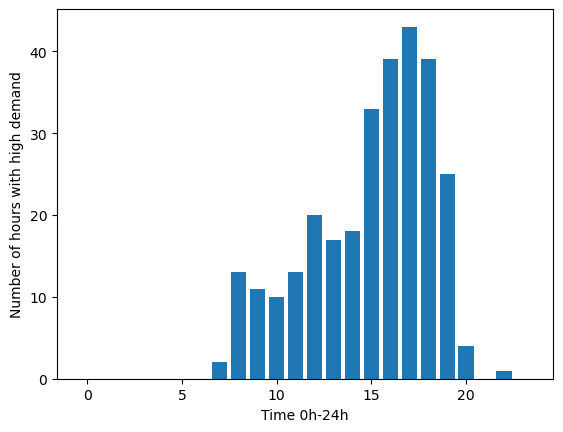

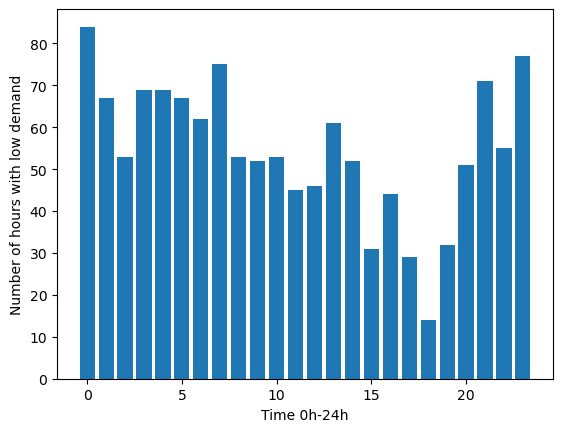

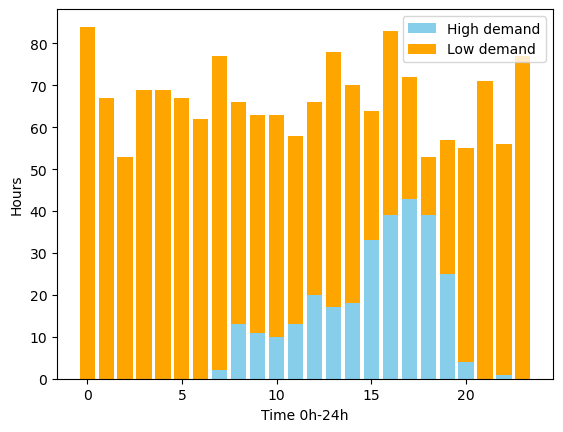

In [94]:
import matplotlib.pyplot as plt
plt.figure()
plt.bar(hours,hours_high_demand)
plt.xlabel('Time 0h-24h')
plt.ylabel('Number of hours with high demand')
plt.figure()
plt.bar(hours,hours_low_demand)
plt.xlabel('Time 0h-24h')
plt.ylabel('Number of hours with low demand')
plt.figure()
plt.bar(hours,hours_high_demand,color='skyblue',label='High demand')
plt.bar(hours,hours_low_demand,bottom=hours_high_demand,color='orange',label='Low demand')
plt.xlabel('Time 0h-24h')
plt.ylabel('Hours')
plt.legend()

In [95]:
# Different weeks
dws = sorted(data['day_of_week'].unique())
dw_high_demand = []
dw_low_demand = []
for dw in dws:
  dw_high_demand.append(len(data.query("day_of_week == @dw and increase_stock == 'high_bike_demand'")))
  dw_low_demand.append(len(data.query("day_of_week == @dw and increase_stock == 'low_bike_demand'")))

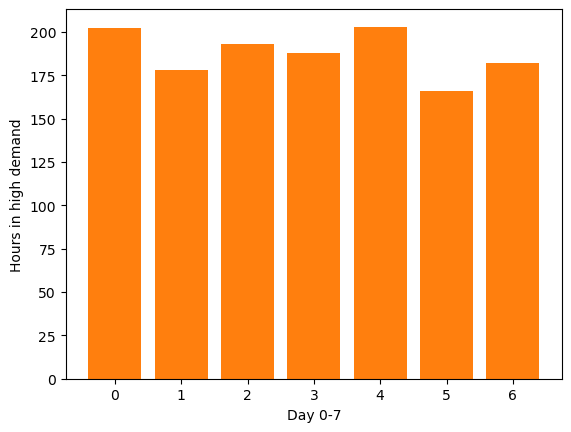

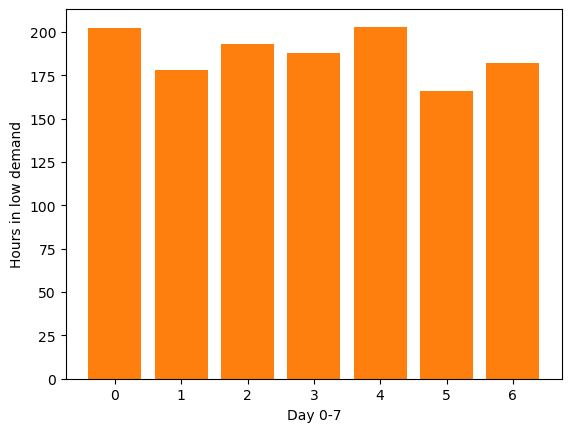

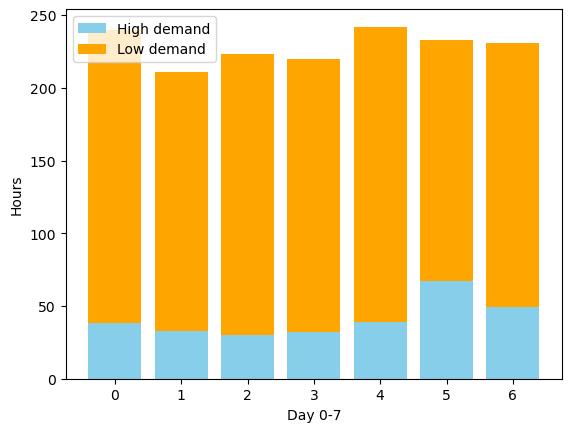

In [96]:
plt.figure()
plt.bar(dws,dw_high_demand)
plt.xlabel('Day 0-7')
plt.ylabel('Hours in high demand')
plt.bar(dws,dw_low_demand)
plt.figure()
plt.bar(dws,dw_high_demand)
plt.xlabel('Day 0-7')
plt.ylabel('Hours in low demand')
plt.bar(dws,dw_low_demand)
plt.figure()
plt.bar(dws,dw_high_demand,color='skyblue',label='High demand')
plt.bar(dws,dw_low_demand,bottom=dw_high_demand,color='orange',label='Low demand')
plt.xlabel('Day 0-7')
plt.ylabel('Hours')
plt.legend()


In [97]:
# Different months
months = sorted(data['month'].unique())
month_high_demand = []
month_low_demand = []
for month in months:
  month_high_demand.append(len(data.query("month == @month and increase_stock == 'high_bike_demand'")))
  month_low_demand.append(len(data.query("month == @month and increase_stock == 'low_bike_demand'")))

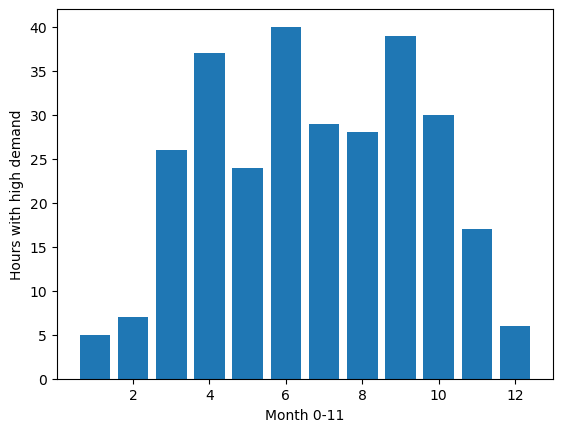

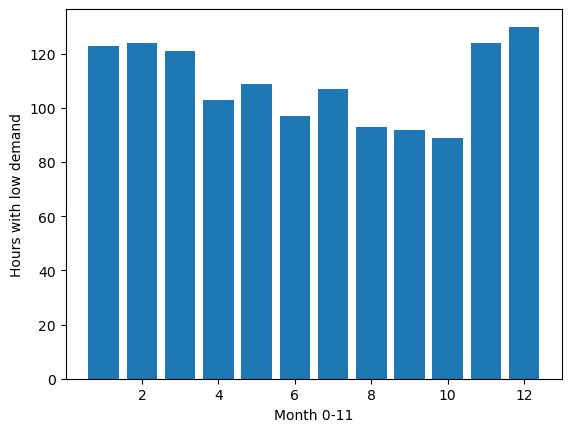

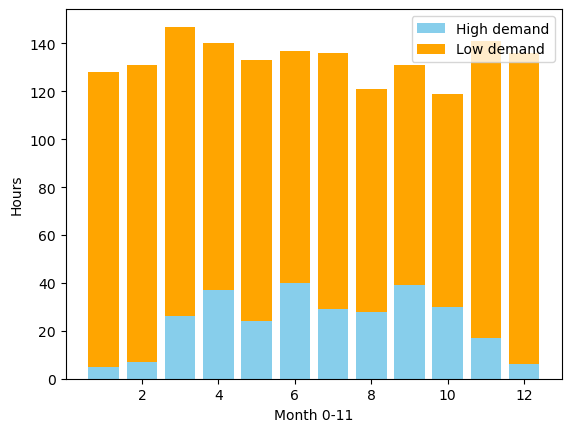

In [98]:
plt.figure()
plt.bar(months,month_high_demand)
plt.xlabel('Month 0-11')
plt.ylabel('Hours with high demand')
plt.figure()
plt.bar(months,month_low_demand)
plt.xlabel('Month 0-11')
plt.ylabel('Hours with low demand')
plt.figure()
plt.bar(months,month_high_demand,color='skyblue',label='High demand')
plt.bar(months,month_low_demand,bottom=month_high_demand,color='orange',label='Low demand')
plt.xlabel('Month 0-11')
plt.ylabel('Hours')
plt.legend()

C:\Users\Vencel\AppData\Local\Temp\ipykernel_17588\600325850.py:15: RuntimeWarning: invalid value encountered in divide
  new_high = np.divide(np.array(temps_high_demand), summation)
C:\Users\Vencel\AppData\Local\Temp\ipykernel_17588\600325850.py:16: RuntimeWarning: invalid value encountered in divide
  new_low = np.divide(np.array(temps_low_demand), summation)


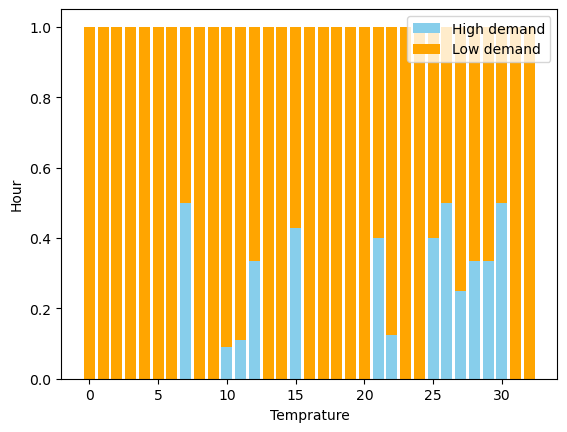

In [99]:
import numpy as np
temps = sorted(data['temp'].astype(int).unique())
temps_high_demand = []
temps_low_demand = []
for temp in temps:
  temps_high_demand.append(len(data.query("temp == @temp and increase_stock == 'high_bike_demand'")))
  temps_low_demand.append(len(data.query("temp == @temp and increase_stock == 'low_bike_demand'")))
plt.figure()

# Calculate the adjusted x-coordinates for the bars
x_positions = np.arange(len(temps))

# Create a bar chart with custom width and x-coordinates
summation = np.add(np.array(temps_high_demand), np.array(temps_low_demand))
new_high = np.divide(np.array(temps_high_demand), summation)
new_low = np.divide(np.array(temps_low_demand), summation)
plt.bar(temps,new_high,color='skyblue',label='High demand')
plt.bar(temps,new_low,bottom=new_high,color='orange',label='Low demand')

plt.xlabel('Temprature')
plt.ylabel('Hour')
plt.legend()

In the next cell we test for the diferent correlations.

We remove three columns [dew, snow, weekday] because they are highly correlated with other columns.

We keep all the others for now, we may remove ones later.

C:\Users\Vencel\AppData\Local\Temp\ipykernel_17588\1172970959.py:3: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  correlation_matrix = data.drop(['dew', 'snow', 'weekday'], axis=1).corr()


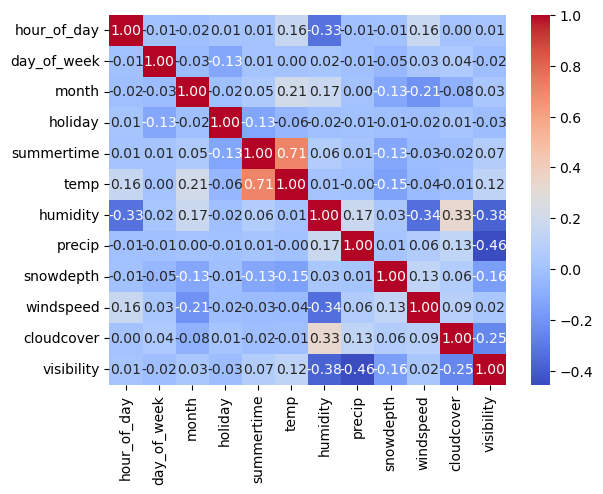

In [100]:
# Weekdays and holidays
# Weekdays correlated to days as weekdays are just 0-5, weekends are 0-2
correlation_matrix = data.drop(['dew', 'snow', 'weekday'], axis=1).corr()

# Display the correlation matrix
# print(correlation_matrix)
import seaborn as sns
import matplotlib.pyplot as plt

# Plotting the heatmap
sns.heatmap(correlation_matrix, annot=True, cmap="coolwarm", fmt=".2f")
plt.show()
from statsmodels.stats.outliers_influence import variance_inflation_factor

<Axes: >

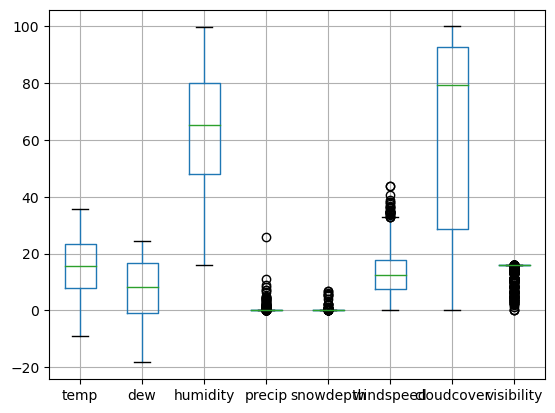

In [101]:
# Do some bar plots of numerical values
numerical.boxplot()

# Importing packages

In [102]:
import numpy as np
import pandas as pd

import sklearn.preprocessing as skl_pre
import sklearn.linear_model as skl_lm
import sklearn.discriminant_analysis as skl_da
import sklearn.neighbors as skl_nb

from sklearn import tree
from sklearn.ensemble import BaggingClassifier, RandomForestClassifier


import matplotlib.pyplot as plt

# Train - valid - test split

In [103]:
from sklearn.preprocessing import normalize
X = normalize(data.drop('increase_stock',axis=1))
y = data[['increase_stock']]

In [104]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=1337)

In [105]:
def print_metrics(model,X_test,y_test):
  y_preds = model.predict(X_test)
  y_test = np.array(y_test).reshape(-1)
  #Confusion Matrix
  cross_vals=pd.crosstab(y_preds, y_test)
  print(cross_vals)
  #True positive (Estimated true and is true)
  TP = cross_vals.iloc[1,1]
  #False positive (Estimated true and is false)
  FP = cross_vals.iloc[1,0]
  #True negative (Estiamted false and is false)
  TN = cross_vals.iloc[0,0]
  #False negative (Estimated false and is true)
  FN = cross_vals.iloc[0,1]
  missclassification_rate = np.mean([y_preds != y_test])
  print(f"Missclassification {missclassification_rate}")
  accuracy = 1-missclassification_rate
  print(f"Accuracy {accuracy}")
  recall = TP/(TP+FN)
  print(f"Recall {recall}")
  precision = TP/(TP+FP)
  print(f"Precision {precision}")
  specificity = TN/(TN+FP)
  print(f"Specificity {specificity}")

# Logistic Regression

In [106]:
model = skl_lm.LogisticRegression(solver='liblinear')

model.fit(X_train, y_train)

print_metrics(model, X_test, y_test)

# prediction = model.predict(X_test)
# numerical_prediction = [(0 if i == 'low_bike_demand' else 1) for i in prediction]

# confusion_matrix(y_test, prediction)
# missclassification = np.mean(y_test != prediction)

col_0             high_bike_demand  low_bike_demand
row_0                                              
high_bike_demand                18                7
low_bike_demand                 55              320
Missclassification 0.155
Accuracy 0.845
Recall 0.9785932721712538
Precision 0.8533333333333334
Specificity 0.2465753424657534


c:\Users\Vencel\anaconda3\Lib\site-packages\sklearn\utils\validation.py:1184: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


# Discriminate Analysis

In [107]:
model = skl_da.LinearDiscriminantAnalysis()
model.fit(X_train, y_train)
print_metrics(model, X_test, y_test)

col_0             high_bike_demand  low_bike_demand
row_0                                              
high_bike_demand                29               17
low_bike_demand                 44              310
Missclassification 0.1525
Accuracy 0.8475
Recall 0.9480122324159022
Precision 0.8757062146892656
Specificity 0.3972602739726027


c:\Users\Vencel\anaconda3\Lib\site-packages\sklearn\utils\validation.py:1184: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [108]:
model = skl_da.QuadraticDiscriminantAnalysis()
model.fit(X_train, y_train)
print_metrics(model, X_test, y_test)

col_0             high_bike_demand  low_bike_demand
row_0                                              
high_bike_demand                28              137
low_bike_demand                 45              190
Missclassification 0.455
Accuracy 0.5449999999999999
Recall 0.581039755351682
Precision 0.8085106382978723
Specificity 0.3835616438356164


c:\Users\Vencel\anaconda3\Lib\site-packages\sklearn\utils\validation.py:1184: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
c:\Users\Vencel\anaconda3\Lib\site-packages\sklearn\discriminant_analysis.py:935: UserWarning: Variables are collinear
  warnings.warn("Variables are collinear")


# K nearest neighbours

In [109]:
n = 10
model = skl_nb.KNeighborsClassifier(n_neighbors=n)
model.fit(X_train, y_train)
print_metrics(model, X_test, y_test)

c:\Users\Vencel\anaconda3\Lib\site-packages\sklearn\neighbors\_classification.py:228: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)


col_0             high_bike_demand  low_bike_demand
row_0                                              
high_bike_demand                45               27
low_bike_demand                 28              300
Missclassification 0.1375
Accuracy 0.8625
Recall 0.9174311926605505
Precision 0.9146341463414634
Specificity 0.6164383561643836


# Tree based methods

In [113]:
#Decision tree
model = tree.DecisionTreeClassifier(max_depth=6)
model.fit(X_train, y_train)
print_metrics(model, X_test, y_test)

col_0             high_bike_demand  low_bike_demand
row_0                                              
high_bike_demand                20                8
low_bike_demand                 53              319
Missclassification 0.1525
Accuracy 0.8475
Recall 0.9755351681957186
Precision 0.8575268817204301
Specificity 0.273972602739726


In [114]:
# Bagging
model = BaggingClassifier()
model.fit(X_train, y_train)
print_metrics(model, X_test, y_test)

c:\Users\Vencel\anaconda3\Lib\site-packages\sklearn\ensemble\_bagging.py:802: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


col_0             high_bike_demand  low_bike_demand
row_0                                              
high_bike_demand                49               37
low_bike_demand                 24              290
Missclassification 0.1525
Accuracy 0.8475
Recall 0.8868501529051988
Precision 0.9235668789808917
Specificity 0.6712328767123288


In [125]:
model = RandomForestClassifier(n_estimators=100, max_depth=15, max_leaf_nodes=200)
model.fit(X_train, y_train)
print_metrics(model, X_test, y_test)

c:\Users\Vencel\anaconda3\Lib\site-packages\sklearn\base.py:1151: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)


col_0             high_bike_demand  low_bike_demand
row_0                                              
high_bike_demand                39               15
low_bike_demand                 34              312
Missclassification 0.1225
Accuracy 0.8775
Recall 0.9541284403669725
Precision 0.9017341040462428
Specificity 0.5342465753424658


# Boosting

In [124]:
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import GradientBoostingClassifier
model = GradientBoostingClassifier(n_estimators=100, max_depth=15,max_leaf_nodes=200)
model.fit(X_train, y_train)
print_metrics(model, X_test, y_test)

c:\Users\Vencel\anaconda3\Lib\site-packages\sklearn\ensemble\_gb.py:424: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


col_0             high_bike_demand  low_bike_demand
row_0                                              
high_bike_demand                42               40
low_bike_demand                 31              287
Missclassification 0.1775
Accuracy 0.8225
Recall 0.8776758409785933
Precision 0.9025157232704403
Specificity 0.5753424657534246
